In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

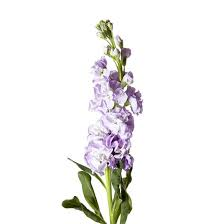

In [3]:
image1 = Image.open("stock1.jpg")
image1

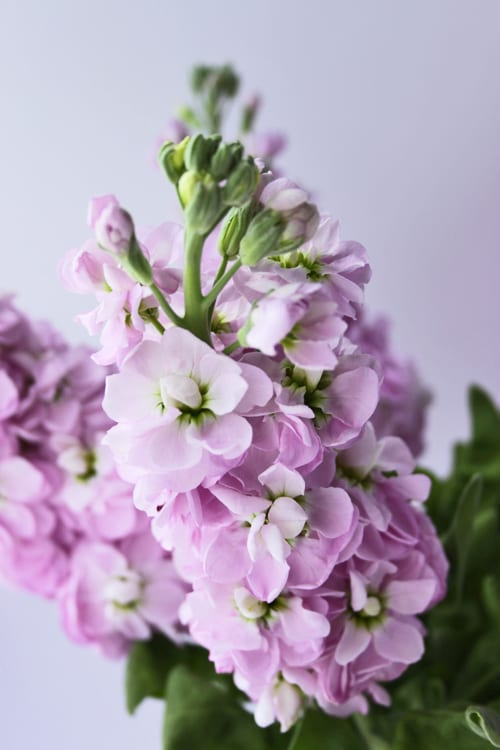

In [4]:
image2 = Image.open("stock2.jpg")
image2

Using Only PIL. No Numpy.

In [6]:
from PIL import Image
# Reading Images
im1 = Image.open("stock1.jpg")
im2 = Image.open("stock2.jpg")
width1, height1 = im1.size
width2, height2 = im2.size
width, height = (width1+width2)//2, (height1+height2)//2
im1 = im1.resize((width, height))
im2 = im2.resize((width, height))
steps = 20
transition_frames = [Image.blend(im1, im2, i) for i in np.linspace(0, 1, steps)]
transition_frames[0].save("out4.gif", save_all=True, 
                          append_images=transition_frames[1:],
                          duration=1000/steps)

Using PIL.Image.\
For Any Image (color or bw)

In [7]:
from PIL import Image
# Reading Images
im1 = np.asarray(Image.open("stock1.jpg"))
im2 = np.array(Image.open("stock2.jpg"))
# Creating Frames of the Transition
steps =  20
r = np.linspace(0, 1, steps)
frames = []
for s in r:
    new = im1 * (1-s) + im2 * s
    frames.append(Image.fromarray(np.uint8(new), "RGB"))
# Creating gif from Frames
frames[0].save("out3.gif", save_all=True, 
               append_images=frames[1:], duration=1000/steps)

ValueError: operands could not be broadcast together with shapes (224,224,3) (750,500,3) 

Using imageio.mimsave.\
Only for BW Images

In [7]:
import imageio
# Reading Images
image1 = plt.imread("download.jpg")
image1 = np.mean(image1, -1)
image2 = plt.imread("download2.jpg")
image2 = np.mean(image2, -1)

# Calc;ating Transition Images
frames=[]
steps =  20
r = np.linspace(0, 1, steps)
for i,s in enumerate(r):
    new = image1 * (1-s) + image2 * s
    frames.append(new)
# Saving all tranitions to one gif
imageio.mimsave("out2.gif", frames, duration=1000 / steps)

Using imageio.get_writer\
Only for BW Images

In [23]:
import imageio
# Reading Images
image1 = plt.imread("download.jpg")
X1 = np.mean(image1, -1)
image2 = plt.imread("download2.jpg")
X2= np.mean(image2, -1)
# Creating Transition
r = np.linspace(0, 1, 20)
with imageio.get_writer("out1.gif", mode="I") as writer:
    for i in r:
        new = X1 * (1-i) + X2 * i
        writer.append_data(new)